In [1]:
#Blind Gripper Object Recognition

In [2]:
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib notebook

In [3]:
data = pd.read_csv('SizeToughWeight.csv')
data.head()

,Type,Weight,Size,Deformation,Unnamed: 4
0,1,19.33,27.0,1.71,NaN
1,1,19.33,38.0,1.90,NaN
2,2,78.00,60.0,1.30,NaN
3,2,78.00,45.0,1.21,NaN
4,2,78.00,30.0,1.07,NaN


In [4]:
data.describe()

,Type,Weight,Size,Deformation,Unnamed: 4
count,27.000000,27.000000,27.000000,27.000000,0.0
mean,2.333333,23.753333,35.574074,3.727407,NaN
std,0.960769,24.954231,11.963714,9.181177,NaN
min,1.000000,2.000000,16.000000,1.070000,NaN
25%,1.000000,7.335000,28.950000,1.700000,NaN
50%,3.000000,14.670000,35.000000,1.850000,NaN
75%,3.000000,31.830000,38.000000,2.390000,NaN
max,4.000000,78.000000,63.000000,49.610000,NaN


<IPython.core.display.Javascript object>


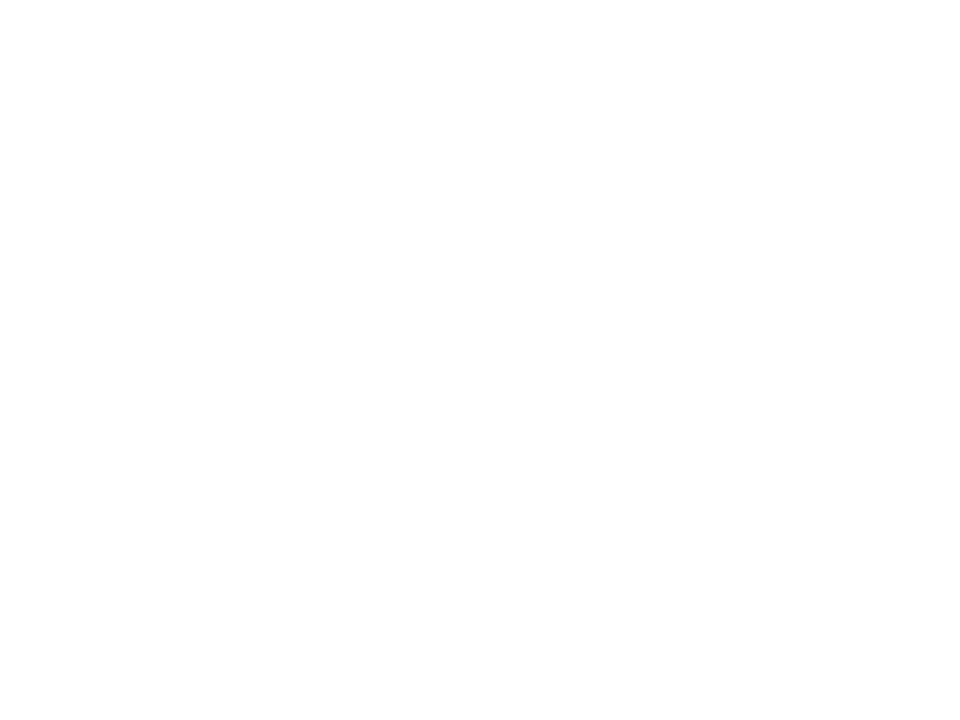

In [5]:
%matplotlib notebook
sns.countplot(data['Type'],label="Count")

In [6]:
data.drop([data.columns.values[4]], inplace = True, axis=1)

In [7]:
X = np.array([data["Size"], data["Weight"], data["Deformation"]]).T
Y = data['Type']

<IPython.core.display.Javascript object>


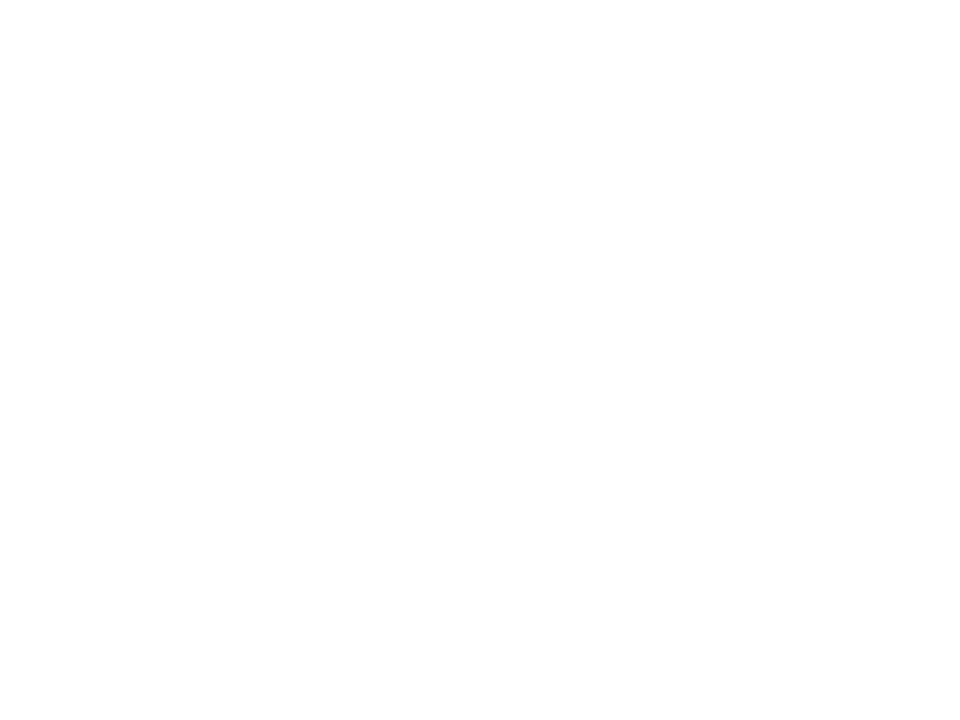

In [8]:
%matplotlib notebook
fig = plt.figure()
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
ax1.scatter(X[:,0],X[:,1], c=Y, cmap='rainbow')
ax2.scatter(X[:,0],X[:,2], c=Y, cmap='rainbow')
ax3.scatter(X[:,1],X[:,2], c=Y, cmap='rainbow')
ax1.set_title('Size vs Weight')
ax2.set_title('Size vs Deformation')
ax3.set_title(' Weight vs Deformation')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

In [9]:
clf = svm.SVC(kernel='linear',gamma='scale', decision_function_shape='ovo')
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

        Test  Score
0   Accuracy    1.0
1  Precision    1.0
2   F1 Score    1.0


<IPython.core.display.Javascript object>


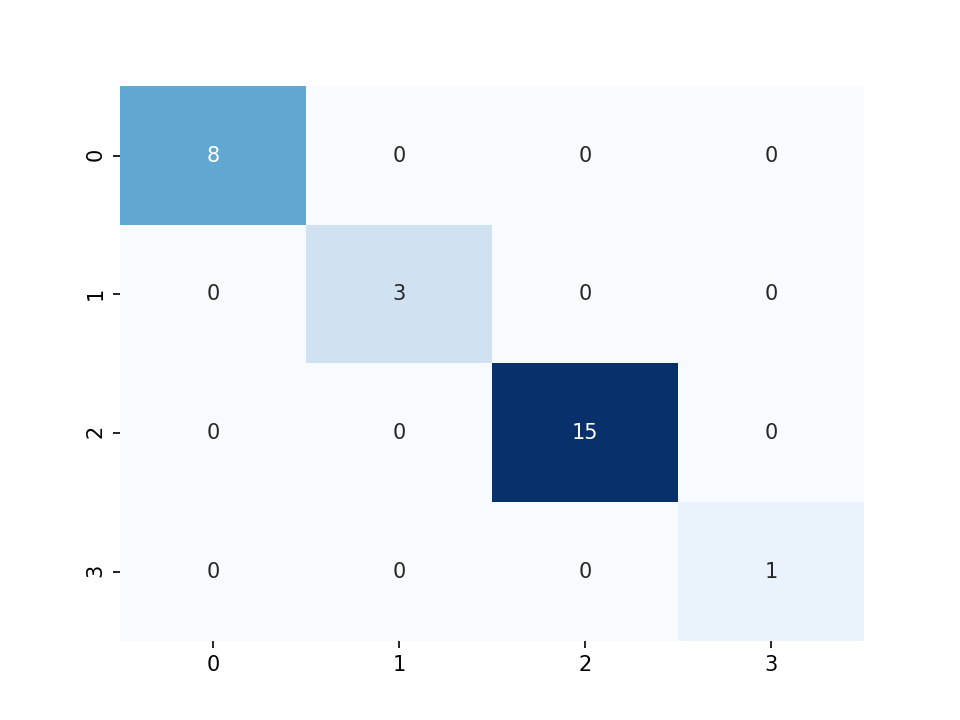

AxesSubplot(0.125,0.11;0.775x0.77)


In [10]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
%matplotlib notebook

y_pred = clf.predict(X)
Result=pd.DataFrame()
Result['Test']=["Accuracy","Precision","F1 Score"]
Result['Score']=[accuracy_score(Y,y_pred),
                 precision_score(Y, y_pred, average='macro'),
                 f1_score(Y,y_pred, average='macro')
                ]
print(Result)
print(sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt="d",cbar=False,cmap='Blues'))

In [ ]:
#Experimentale comparaison with c++ SVM

In [84]:
exp= np.array([[17.5], [18.7], [2.6]]).T
print(clf.predict(exp))

[1]


In [64]:
clf.predict(X)

array([1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3, 4, 1, 1, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3], dtype=int64)